# Question 9

This script plots a number of headings on a polar plot and calculates the
average heading.

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from config import SNS_PALETTE

In [1]:
# Define the set of headings (in degrees)
headings = [11, 15, 350, 330, 23, 347, 17, 356, 6, 358]

In [5]:
# Define a function for calculating average heading as complex numbers
def average_heading(headings: list[float]) -> float:
    """
    Returns the average heading in degrees of the given list of headings.
    """
    return np.rad2deg(np.angle(np.average(np.exp(1j * np.deg2rad(headings)))))

In [4]:
from matplotlib.axes import Axes

# Define a utility function for drawing arrows on a polar plot
def draw_arrow(x: float, y: float, dx: float, dy: float, ax: Axes,
        arrowprops: dict = None):
    """
    Draws an arrow on the given axes from (x, y) to (x+dx, y+dy).
    """
    arrowprops = arrowprops or {
        "arrowstyle": "-|>", "color": sns.color_palette(SNS_PALETTE)[1]}

    ax.annotate("", xy=(x + dx, y + dy), xytext=(x, y), arrowprops=arrowprops)

Average heading: 1.39 [deg]


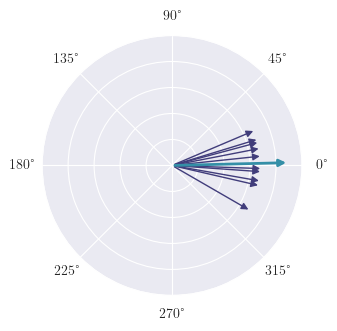

In [7]:
from config import A1_ROOT, SAVEFIG_CONFIG

# Visualise the headings and their average on a polar plot
fig = plt.figure(figsize=(6, 3.375))
ax = fig.add_subplot(projection='polar')

for phi in np.deg2rad(headings):
    draw_arrow(0, 0, phi, 0.7, ax)

avg = average_heading(headings)
print("Average heading:", np.round(avg, decimals=3), "[deg]")

draw_arrow(0, 0, np.deg2rad(avg), 0.9, ax, arrowprops={"arrowstyle": "-|>",
    "color": sns.color_palette(SNS_PALETTE)[3], "lw": 2})

# Hide magnitude labels
ax.set_yticklabels([])

fname = Path(A1_ROOT, "output", "q9_headings.png")
fig.savefig(fname, **SAVEFIG_CONFIG)